# Task1: Regression

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from matplotlib import pyplot as plt
from sklearn import preprocessing
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor

import lightgbm as lgb
from lightgbm.sklearn import LGBMRegressor

from xgboost import XGBRegressor, plot_importance

from sklearn.linear_model import Ridge, LassoCV, HuberRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from mlxtend.regressor import StackingCVRegressor

import seaborn as sns


plt.style.use('fivethirtyeight')
import warnings

warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
train = pd.read_csv('../clean/train.csv')
test = pd.read_csv('../clean/test.csv')
train[train['density'].isna()]

,property_type,tenure,built_year,num_beds,num_baths,size_sqft,furnishing,available_unit_types,lat,lng,subzone,planning_area,price,shop_dist,mrt_dist,commercials_dist,second_school_dist,primary_school_dist,density


In [3]:
labelEnc = preprocessing.LabelEncoder()
train.planning_area = labelEnc.fit_transform(train.planning_area)
train.subzone = labelEnc.fit_transform(train.subzone)
train.furnishing = labelEnc.fit_transform(train.furnishing)
train.tenure = labelEnc.fit_transform(train.tenure)
train.property_type = labelEnc.fit_transform(train.property_type)
train.available_unit_types = labelEnc.fit_transform(train.available_unit_types)

test.planning_area = labelEnc.fit_transform(test.planning_area)
test.subzone = labelEnc.fit_transform(test.subzone)
test.furnishing = labelEnc.fit_transform(test.furnishing)
test.tenure = labelEnc.fit_transform(test.tenure)
test.property_type = labelEnc.fit_transform(test.property_type)
test.available_unit_types = labelEnc.fit_transform(test.available_unit_types)

In [4]:
test.isnull().sum()

property_type           0
tenure                  0
built_year              0
num_beds                0
num_baths               0
size_sqft               0
furnishing              0
available_unit_types    0
lat                     0
lng                     0
subzone                 0
planning_area           0
shop_dist               0
mrt_dist                0
commercials_dist        0
second_school_dist      0
primary_school_dist     0
density                 0
dtype: int64

In [5]:
df_X = train.drop(axis=1,columns=['price'])
df_y = train["price"]

In [6]:
df_X.isnull().sum()

property_type           0
tenure                  0
built_year              0
num_beds                0
num_baths               0
size_sqft               0
furnishing              0
available_unit_types    0
lat                     0
lng                     0
subzone                 0
planning_area           0
shop_dist               0
mrt_dist                0
commercials_dist        0
second_school_dist      0
primary_school_dist     0
density                 0
dtype: int64

In [7]:
# Convert dataframes to numpy arrays
X, y = df_X.to_numpy(), df_y.to_numpy()
y = y.ravel().astype(int)

# Split dataset in training and test data (20% test data)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
y_train = y_train
# Normalize data using the sciki-learn StandardScaler
scaler = preprocessing.StandardScaler().fit(X_train)
X_train, X_test = scaler.transform(X_train), scaler.transform(X_test)

print('Number of features: {}'.format(X_train.shape[1]))
print('Number of samples for training: {}'.format(X_train.shape[0]))
print('Number of samples for testing: {}'.format(X_test.shape[0]))

Number of features: 18
Number of samples for training: 15961
Number of samples for testing: 3991


In [8]:
%%time
randomForestRegressor = RandomForestRegressor().fit(X_train, y_train)
decisionTreeRegressor = DecisionTreeRegressor().fit(X_train, y_train)
adaBoostRegressor = AdaBoostRegressor().fit(X_train, y_train)
gdbtRegressor = GradientBoostingRegressor().fit(X_train, y_train)

CPU times: user 11.6 s, sys: 90.9 ms, total: 11.7 s
Wall time: 11.7 s


In [9]:

%%time
print('Root Mean Squared Errors for all regressors')
print('============================')
rlist = []

for rgs in [decisionTreeRegressor, randomForestRegressor, gdbtRegressor]:
    try:
        # Predict for test samples
        y_pred = rgs.predict(X_test)
        # Calculate the root mean squared error and mean absolute error
        rmse = np.sqrt(mean_squared_error(y_test, y_pred))
        mae = mean_absolute_error(y_test, y_pred)
        rlist.append(rmse)
    except Exception as e:
        print(e)
        # Handle exception (e.g., a classifier is still None)
        mae = '---'

    print('{} mae: {:.3} rmse: {:.3}'.format(type(rgs).__name__, mae, rmse))


Root Mean Squared Errors for all regressors
DecisionTreeRegressor mae: 3.09e+05 rmse: 1.73e+06
RandomForestRegressor mae: 2.9e+05 rmse: 1.61e+06
GradientBoostingRegressor mae: 6.51e+05 rmse: 2.21e+06
CPU times: user 98.7 ms, sys: 1.59 ms, total: 100 ms
Wall time: 98.8 ms


In [10]:
rlist

[1726684.6580349423, 1610781.0323169262, 2212282.4571976056]

In [11]:
%%time
X, y = df_X.to_numpy(), df_y.to_numpy()
y = y.ravel().astype(int)

# LightGBM
train_X, val_X, train_y, val_y = train_test_split(X, y, test_size=0.2)
my_imputer = SimpleImputer()
train_X = my_imputer.fit_transform(train_X)
val_X = my_imputer.transform(val_X)

lgbm = lgb.LGBMRegressor(objective='regression', learning_rate=0.05, n_estimators=1000)
lgbm.fit(train_X, train_y, verbose=False)

predictions = lgbm.predict(val_X)

rmse = np.sqrt(mean_squared_error(predictions, val_y))
print("Root Mean Squared Error : " + str(rmse))
#rlist.append(rmse)

Root Mean Squared Error : 66758556.22664358
CPU times: user 13.9 s, sys: 550 ms, total: 14.4 s
Wall time: 1.44 s


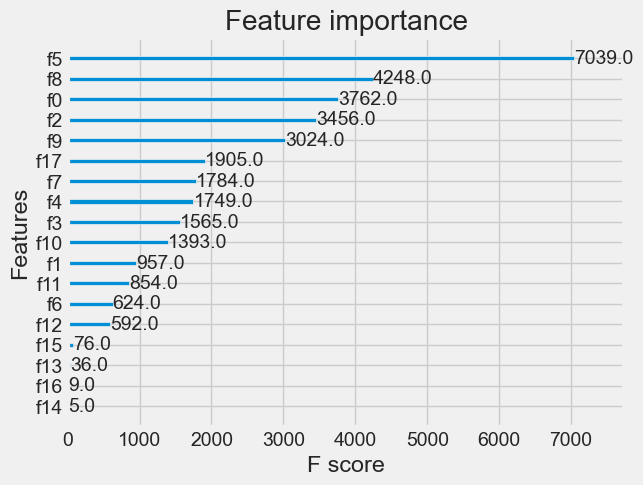

Root Mean Squared Error : 1716725.2015756674
CPU times: user 1min 6s, sys: 1.58 s, total: 1min 8s
Wall time: 6.1 s


In [12]:
%%time

X, y = df_X.to_numpy(), df_y.to_numpy()
y = y.ravel().astype(int)

# XGBoost
X1_train, X1_test, y1_train, y1_test = train_test_split(X, y, test_size=0.2, random_state=0)
y1_train = y1_train

xgb = XGBRegressor(learning_rate=0.05, n_estimators=1000,  objective='reg:gamma')
xgb.fit(X1_train, y1_train)

y1_pred = xgb.predict(X1_test)

plot_importance(xgb)
plt.show()

rmse = np.sqrt(mean_squared_error(y1_pred, y1_test))
print("Root Mean Squared Error : " + str(rmse))
#rlist.append(rmse)

In [13]:
%%time

stackmodel = StackingCVRegressor(regressors=(decisionTreeRegressor, randomForestRegressor, gdbtRegressor, lgbm, xgb), meta_regressor=randomForestRegressor, use_features_in_secondary=True)
rgs_stack = stackmodel.fit(X_train, y_train)
y_pred = rgs_stack.predict(X_test)

# Calculate the root mean squared error
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
print('{} mae: {:.3} rmse: {:.3}'.format(type(rgs_stack).__name__, mae, rmse))
# rlist.append(rmse)

StackingCVRegressor mae: 2.89e+05 rmse: 1.69e+06
CPU times: user 7min 52s, sys: 6.72 s, total: 7min 58s
Wall time: 1min 48s


In [15]:
plt.figure()
x = ["DTree", "RForest", "GB", "XGB", "LGBM", "Stacking"]
y = rlist
sns.barplot(x, y)
plt.title("Distribution plot of RMSE")

TypeError: barplot() takes from 0 to 1 positional arguments but 2 were given

<Figure size 640x480 with 0 Axes>

In [16]:
%%time

model = None

param_grid = {
    'n_estimators': [20, 40, 100],
    'max_depth': [3, 10, None],
    'max_features': [12, 18, 27],
    'bootstrap': [True]
             }

rgs = RandomForestRegressor()
model = GridSearchCV(rgs, param_grid, cv=5,
                          scoring='neg_mean_squared_error')
model.fit(X_train, y_train)

# Store the parameters of the best model
best_params = model.best_params_

# Predict with test data on the model with the best found parameters
y_pred = model.predict(X_test)

# Calculate the root mean squared error
best_rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print('Best RandomForestRegressor: {} (RMSE: {:.3f})'.format(best_params, best_rmse))

Best RandomForestRegressor: {'bootstrap': True, 'max_depth': 3, 'max_features': 12, 'n_estimators': 40} (RMSE: 2801255.418)
CPU times: user 6min 2s, sys: 2.42 s, total: 6min 5s
Wall time: 10h 35min 31s


In [17]:
pd.Series(y_pred).to_csv('./prediction1.csv',index=True,index_label=['Id','Predicted'])

In [18]:
%%time

rgs = rgs_stack
X_for_test = scaler.transform(test)
y_pred_stack = rgs.predict(X_for_test)

CPU times: user 8.08 s, sys: 2.18 s, total: 10.3 s
Wall time: 3.5 s


In [19]:
pd.Series(y_pred).to_csv('./prediction2.csv',index=True,index_label=['Id','Predicted'])

In [ ]:
y_pred